In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr  3 19:58:35 2019

@author: mor
"""

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [2]:


#df = pd.read_csv('https://assets.datacamp.com/production/repositories/3841/datasets/8d1e83b34b9623b998e067a15f82dc95c0a1a4d1/pollution_tidy.csv')
#df.to_csv('data/pollution_tidy.csv',index=False)
df = pd.read_csv('data/pollution_tidy.csv')


In [3]:

#'CO', 'NO2', 'O3', 'SO2'
df_co=df[df.pollutant=='CO']
df_co=df_co.rename(columns={'value':'CO'}).drop('pollutant',axis=1)

df_no2=df[df.pollutant=='NO2']
df_no2=df_no2.rename(columns={'value':'NO2'}).drop('pollutant',axis=1)

df_o3=df[df.pollutant=='O3']
df_o3=df_o3.rename(columns={'value':'O3'}).drop('pollutant',axis=1)

df_so2=df[df.pollutant=='SO2']
df_so2=df_so2.rename(columns={'value':'SO2'}).drop('pollutant',axis=1)


In [4]:


pollution= pd.merge(df_co,df_no2,left_on=['state', 'city','year', 'month', 'day'],right_on=['state', 'city','year', 'month', 'day'])
pollution= pd.merge(pollution,df_o3,left_on=['state', 'city','year', 'month', 'day'],right_on=['state', 'city','year', 'month', 'day'])
pollution= pd.merge(pollution,df_so2,left_on=['state', 'city','year', 'month', 'day'],right_on=['state', 'city','year', 'month', 'day'])

pollution=pollution[['state', 'city','year', 'month', 'day','CO','NO2', 'O3', 'SO2']]

pollution=pollution.sort_values(['city','year','month','day'])
#pollution.to_csv('data/pollution.csv',index=False)



In [5]:


pollution=pd.read_csv('data/pollution.csv')



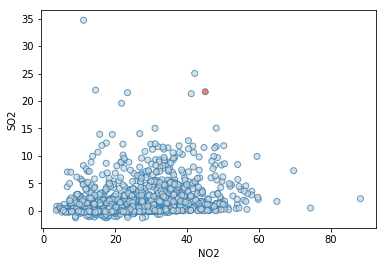

In [6]:


houston_pollution = pollution[pollution.city  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points 
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()



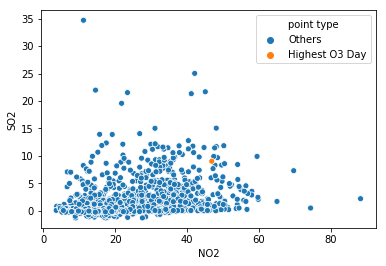

In [7]:


houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point type'] = ['Highest O3 Day' if O3  ==  max_O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point type',
                data = houston_pollution)
plt.show()



C:\Users\mor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


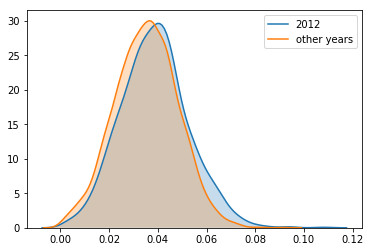

In [8]:


# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3.values, 
            # Shade under kde and add a helpful label
            shade = True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3.values, 
            # Again, shade under kde and add a helpful label
            shade = True,
            label = 'other years')
plt.show()



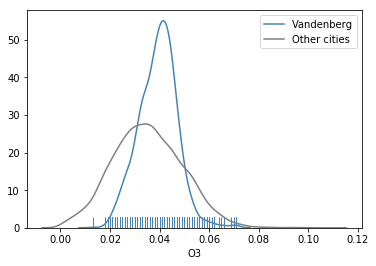

In [9]:


sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg', 
             # Turn of the histogram and color blue to stand out
             hist = False,
             color = 'steelblue', 
             # Turn on rugplot
             rug = True)

sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3, 
             label = 'Other cities',
             # Turn off histogram and color gray
             hist = False,  
             color = 'gray')
plt.show()




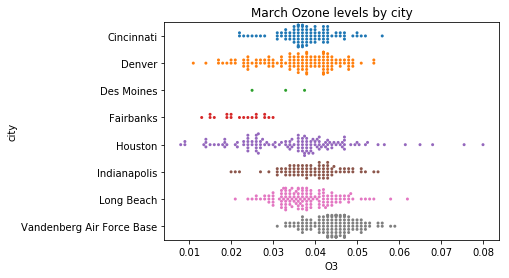

In [10]:


# Filter data to just March
pollution_mar = pollution[pollution.month == 3]

# Plot beeswarm with x as O3
sns.swarmplot(y = "city",
              x = 'O3', 
              data = pollution_mar, 
              # Decrease the size of the points to avoid crowding 
              size = 3)

# Give a descriptive title
plt.title('March Ozone levels by city')
plt.show()



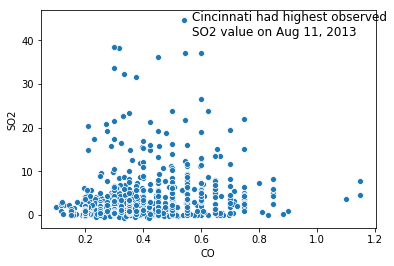

In [11]:


# Draw basic scatter plot of pollution data for August
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'})
plt.show()



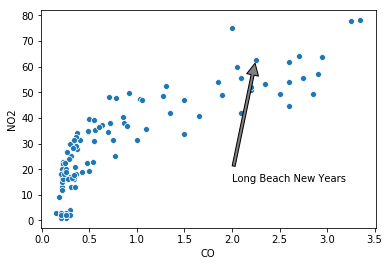

In [12]:


# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(day  ==  1) & (city  ==  'Long Beach')")

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears.CO, lb_newyears.NO2), #where to point the arrow
             xytext = (2, 15), # where to display the text
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white')
plt.show()



In [13]:


# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]



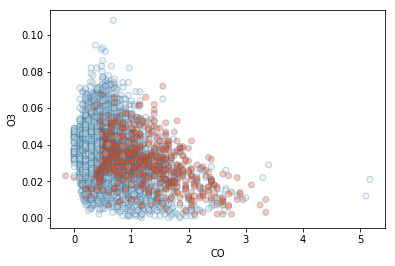

In [14]:


# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False, 
            scatter_kws = {'facecolors':is_lb, 'alpha' :0.3})
plt.show() 



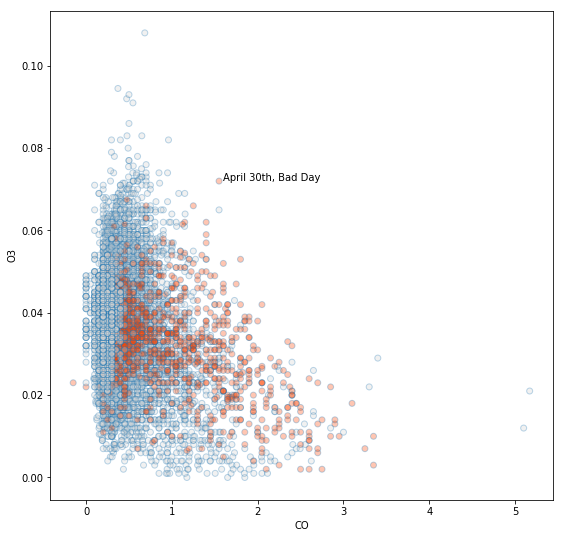

In [15]:


plt.figure(figsize=(9,9))
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False,
            scatter_kws = {'facecolors':is_lb, 'alpha': 0.3})

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show() 



